In [59]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from tensorflow.keras.models import load_model

In [60]:
model = load_model('New_tech_Human.h5')

In [61]:
# model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 64)       

In [62]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d_10',
 'max_pooling2d_10',
 'batch_normalization_10',
 'conv2d_11',
 'max_pooling2d_11',
 'batch_normalization_11',
 'conv2d_12',
 'max_pooling2d_12',
 'batch_normalization_12',
 'conv2d_13',
 'max_pooling2d_13',
 'batch_normalization_13',
 'conv2d_14',
 'max_pooling2d_14',
 'batch_normalization_14',
 'dropout_2',
 'flatten_2',
 'dense_4',
 'dense_5']

In [63]:
model.layers

In [64]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 222, 222, 32) dtype=float32 (created by layer 'conv2d_10')>,
 <KerasTensor: shape=(None, 111, 111, 32) dtype=float32 (created by layer 'max_pooling2d_10')>,
 <KerasTensor: shape=(None, 111, 111, 32) dtype=float32 (created by layer 'batch_normalization_10')>,
 <KerasTensor: shape=(None, 109, 109, 64) dtype=float32 (created by layer 'conv2d_11')>,
 <KerasTensor: shape=(None, 54, 54, 64) dtype=float32 (created by layer 'max_pooling2d_11')>,
 <KerasTensor: shape=(None, 54, 54, 64) dtype=float32 (created by layer 'batch_normalization_11')>,
 <KerasTensor: shape=(None, 52, 52, 64) dtype=float32 (created by layer 'conv2d_12')>,
 <KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'max_pooling2d_12')>,
 <KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'batch_normalization_12')>,
 <KerasTensor: shape=(None, 24, 24, 96) dtype=float32 (created by layer 'conv2d_13')>,
 <KerasTensor: shape=(None, 12, 12, 96) dtype=float32 (created

In [65]:
feature_map_model = Model(inputs=model.input, outputs=layer_outputs)


In [66]:
image_path= '/Users/Prayag Sharma/Desktop/practice repo/Face_extractor/images/Abhay_Deol/43.jpg'
img = load_img(image_path, target_size=(224,224))  
input = img_to_array(img)                           
input = input.reshape((1,) + input.shape)                   
input /= 255.0

In [67]:
import numpy as np

In [70]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [71]:
feature_maps = feature_map_model.predict(input)
print(feature_maps)
feature_maps2=np.array(feature_maps,dtype="float32")
feature_maps2=feature_maps2.flatten()
print(feature_maps2)

[array([[[[2.90043831e-01, 5.17667532e-01, 1.71161845e-01, ...,
          0.00000000e+00, 3.82158369e-01, 3.49996120e-01],
         [2.91946054e-01, 5.18884897e-01, 1.71468034e-01, ...,
          0.00000000e+00, 3.83087069e-01, 3.50263625e-01],
         [2.89586723e-01, 5.22949815e-01, 1.65947855e-01, ...,
          0.00000000e+00, 3.83746624e-01, 3.54706556e-01],
         ...,
         [2.80985504e-01, 4.23716724e-01, 1.53460979e-01, ...,
          6.09403849e-03, 3.72526437e-01, 2.89028078e-01],
         [2.80985504e-01, 4.23716724e-01, 1.53460979e-01, ...,
          6.09403849e-03, 3.72526437e-01, 2.89028078e-01],
         [2.80985504e-01, 4.23716724e-01, 1.53460979e-01, ...,
          6.09403849e-03, 3.72526437e-01, 2.89028078e-01]],

        [[2.84288853e-01, 5.17144322e-01, 1.72201678e-01, ...,
          0.00000000e+00, 3.82352680e-01, 3.51737887e-01],
         [2.93591499e-01, 5.20555198e-01, 1.69165209e-01, ...,
          0.00000000e+00, 3.87998194e-01, 3.52503151e-01],
       

ValueError: could not broadcast input array from shape (222,222,32) into shape (1)

In [72]:
feature_maps = feature_map_model.predict(input)
ini_array1 = np.array(feature_maps,dtype="object")
  
# printing initial arrays
print("initial array", str(ini_array1))
  
# Multiplying arrays
# result = ini_array1.flatten()
  
# printing result
# print("New resulting array: ", result)

ValueError: could not broadcast input array from shape (222,222,32) into shape (1)

In [ ]:
for layer_name, feature_map in zip(layer_names, feature_maps):print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")


The shape of the conv2d_10 is =======>> (1, 222, 222, 32)
The shape of the max_pooling2d_10 is =======>> (1, 111, 111, 32)
The shape of the batch_normalization_10 is =======>> (1, 111, 111, 32)
The shape of the conv2d_11 is =======>> (1, 109, 109, 64)
The shape of the max_pooling2d_11 is =======>> (1, 54, 54, 64)
The shape of the batch_normalization_11 is =======>> (1, 54, 54, 64)
The shape of the conv2d_12 is =======>> (1, 52, 52, 64)
The shape of the max_pooling2d_12 is =======>> (1, 26, 26, 64)
The shape of the batch_normalization_12 is =======>> (1, 26, 26, 64)
The shape of the conv2d_13 is =======>> (1, 24, 24, 96)
The shape of the max_pooling2d_13 is =======>> (1, 12, 12, 96)
The shape of the batch_normalization_13 is =======>> (1, 12, 12, 96)
The shape of the conv2d_14 is =======>> (1, 10, 10, 32)
The shape of the max_pooling2d_14 is =======>> (1, 5, 5, 32)
The shape of the batch_normalization_14 is =======>> (1, 5, 5, 32)
The shape of the dropout_2 is =======>> (1, 5, 5, 32)
Th

In [ ]:
for layer_name, feature_map in zip(layer_names, feature_maps):   
    if len(feature_map.shape) == 4:
        k = feature_map.shape[-1]  


In [ ]:
for i in range(k):
    feature_image = feature_map[0, :, :, i]

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

In [ ]:
img = load_img('/Users/Prayag Sharma/Desktop/practice repo/Face_extractor/images/Abhay_Deol/43.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)

In [ ]:
img = expand_dims(img, axis=0)

In [ ]:
layer_names = [layer.name for layer in model.layers]
layer_names

[]

In [ ]:
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
print(feature_maps)
model.layers

[[[[ 0.         0.         0.        ... 10.908647   0.
     0.       ]
   [ 0.         0.         0.        ... 11.589641   0.
     0.       ]
   [ 0.         0.         0.        ... 10.056392   0.
     0.       ]
   ...
   [ 0.         0.         0.        ... 12.45341    0.
     0.       ]
   [ 0.         0.         0.        ... 11.651314   0.
     0.       ]
   [ 0.         0.         0.        ... 11.1727295  0.
     0.       ]]

  [[ 0.         0.         0.        ... 12.129979   0.
     0.       ]
   [ 0.         0.         0.        ... 11.083777   0.
     0.       ]
   [ 0.         0.         0.        ... 11.119911   0.
     0.       ]
   ...
   [ 0.         0.         0.        ... 11.85456    0.
     0.       ]
   [ 0.         0.         0.        ... 10.925747   0.
     0.       ]
   [ 0.         0.         0.        ... 11.1727295  0.
     0.       ]]

  [[ 0.         0.         0.        ... 10.993049   0.
     0.       ]
   [ 0.         0.         0.        ... 10.79

[]

TypeError: Invalid shape (1, 111, 111, 32) for image data

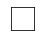

In [ ]:
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0,:,:, ix-1],cmap='gray')
        arr1=feature_maps[0,:,:, ix-1]
        ix += 1
# show the figure
pyplot.show()

In [ ]:
arr1.size

50176

## DBSCAN

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]

arr1 = StandardScaler().fit_transform(arr1)

NameError: name 'arr1' is not defined

In [ ]:
db = DBSCAN(eps=0.00003, min_samples=10).fit(arr1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

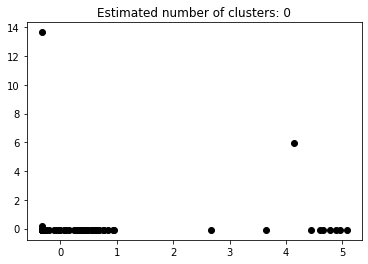

In [ ]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = arr1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = arr1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()